In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the updated Excel file
file_path = r"C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Peak picking algorithm\Normalized CSV Files\Final Values Sorted.xlsx"

# Load the Excel file
df = pd.read_excel(file_path)

# Display the column names to identify any discrepancies
print("Column Names:", df.columns)

# Ensure the Output column is numeric and handle non-numeric values
df['Output'] = pd.to_numeric(df['Output'], errors='coerce')

# Filter out the positive values
df_negative = df[df['Output'] < 0]

# Separate the data into two DataFrames based on concentration
df_0ng = df_negative[df_negative['Concentration'] == '0ng/mL']
df_100ng = df_negative[df_negative['Concentration'] == '100ng/mL']

# Average the negative values for each mV and Hz combination
df_0ng_avg = df_0ng.groupby(['mV', 'Hz'], as_index=False)['Output'].mean()
df_100ng_avg = df_100ng.groupby(['mV', 'Hz'], as_index=False)['Output'].mean()

# Create pivot tables for the heatmaps
pivot_table_0ng = df_0ng_avg.pivot(index='Hz', columns='mV', values='Output')
pivot_table_100ng = df_100ng_avg.pivot(index='Hz', columns='mV', values='Output')

# Create the heatmap for 0ng/mL
plt.figure(figsize=(10, 8))
heatmap_0ng = sns.heatmap(pivot_table_0ng, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Output Values for 0ng/mL')
plt.xlabel('Amplitude (mV)')
plt.ylabel('Frequency (Hz)')
heatmap_file_path_0ng = r"C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Peak picking algorithm\Heatmap_Output_0ng.png"
plt.savefig(heatmap_file_path_0ng)
plt.show()

# Create the heatmap for 100ng/mL
plt.figure(figsize=(10, 8))
heatmap_100ng = sns.heatmap(pivot_table_100ng, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Output Values for 100ng/mL')
plt.xlabel('Amplitude (mV)')
plt.ylabel('Frequency (Hz)')
heatmap_file_path_100ng = r"C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Peak picking algorithm\Heatmap_Output_100ng.png"
plt.savefig(heatmap_file_path_100ng)
plt.show()

print(f"Heatmap for 0ng/mL saved to: {heatmap_file_path_0ng}")
print(f"Heatmap for 100ng/mL saved to: {heatmap_file_path_100ng}")


Column Names: Index(['File', 'Voltage (mV)', 'Frequency (Hz)', 'Instance',
       'Lowest Trough Value'],
      dtype='object')


KeyError: 'Output'

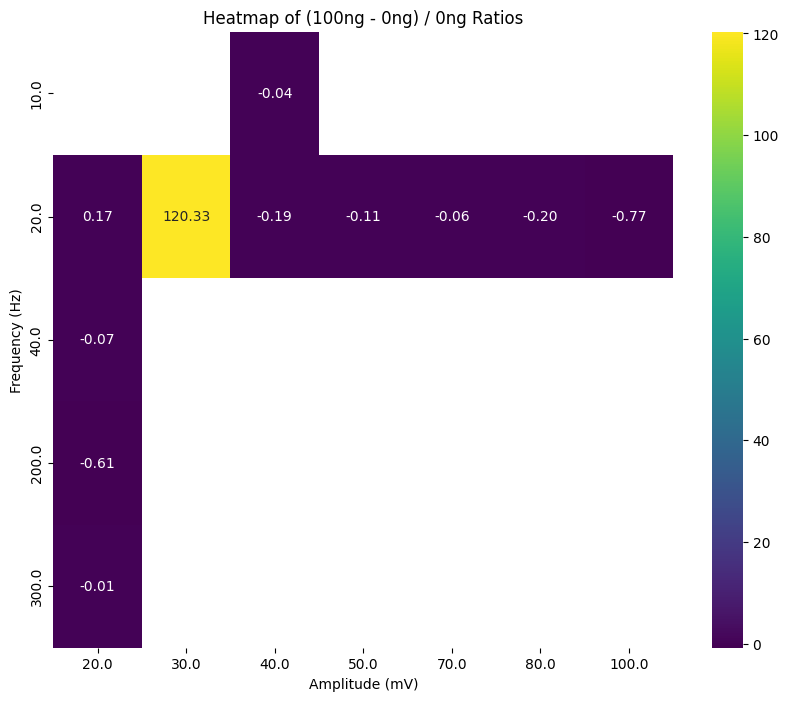

Heatmap for the ratio saved to: C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Peak picking algorithm\Heatmap_Output_Ratio.png


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the updated CSV file
file_path = r"C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Peak picking algorithm\Final_Values_Sorted.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Ensure the Output column is numeric and handle non-numeric values
df['Output'] = pd.to_numeric(df['Output'], errors='coerce')

# Filter out the positive values
df_negative = df[df['Output'] < 0]

# Separate the data into two DataFrames based on concentration
df_0ng = df_negative[df_negative['Concentration'] == '0ng/mL']
df_100ng = df_negative[df_negative['Concentration'] == '100ng/mL']

# Average the negative values for each mV and Hz combination
df_0ng_avg = df_0ng.groupby(['mV', 'Hz'], as_index=False)['Output'].mean()
df_100ng_avg = df_100ng.groupby(['mV', 'Hz'], as_index=False)['Output'].mean()

# Merge the two DataFrames on mV and Hz
merged_df = pd.merge(df_0ng_avg, df_100ng_avg, on=['mV', 'Hz'], suffixes=('_0ng', '_100ng'))

# Calculate the ratio ((100ng - 0ng) / 0ng)
merged_df['Ratio'] = (merged_df['Output_100ng'] - merged_df['Output_0ng']) / merged_df['Output_0ng']

# Create a pivot table for the heatmap
pivot_table_ratio = merged_df.pivot(index='Hz', columns='mV', values='Ratio')

# Create the heatmap for the ratio
plt.figure(figsize=(10, 8))
heatmap_ratio = sns.heatmap(pivot_table_ratio, cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of (100ng - 0ng) / 0ng Ratios')
plt.xlabel('Amplitude (mV)')
plt.ylabel('Frequency (Hz)')
heatmap_file_path_ratio = r"C:\Users\kulma\OneDrive\Documents\School\MASc Year 1\Surface Profilometry Analyzer\Surface-Profilometry-Analyzer\Peak picking algorithm\Heatmap_Output_Ratio.png"
plt.savefig(heatmap_file_path_ratio)
plt.show()

print(f"Heatmap for the ratio saved to: {heatmap_file_path_ratio}")
